## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
pd.options.display.max_columns = 50

## Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((891, 12), (418, 11))

### EDA and Feature Engineering

#### Pclass, Sex and Embarked 

In [3]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.200,NaN,C
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.225,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.550,NaN,S


In [4]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.500,A21,S
306,1198,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.550,C22 C26,S
210,1102,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.525,NaN,S


In [5]:
train['Sex'] = train['Sex'].map({'male':1, 'female':0})
dummies = pd.get_dummies(train[['Embarked', 'Pclass']].astype(object), prefix=['Embarked', 'Pclass'])
train = pd.concat([train, dummies], axis=1)

#### Age, SibSp, Parch, Fare

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 62., 102., 220., 167.,  89.,  48.,  19.,   6.,   1.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

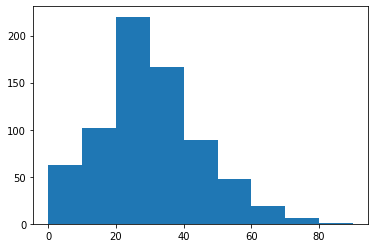

In [7]:
plt.hist(train['Age'], bins=[x for x in range(0, 91, 10)])

In [8]:
train['Age_young'] = 0
train['Age_old'] = 0
train.loc[train['Age'] < 20, 'Age_young'] = 1
train.loc[train['Age'] > 50, 'Age_old'] = 1

(array([608., 209.,  28.,  16.,  18.,   5.,   0.,   7.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 8 Patch objects>)

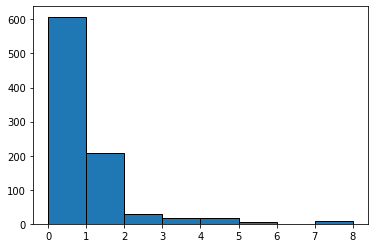

In [9]:
plt.hist(train['SibSp'], edgecolor='black', bins=[0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
train['SibSp_0'] = 0
train['SibSP_1'] = 0
train['SibSp_2_more'] = 0
train.loc[train['SibSp'] == 0, 'SibSp_0'] = 1
train.loc[train['SibSp'] == 1, 'SibSP_1'] = 1
train.loc[train['SibSp'] >= 2, 'SibSp_2_more'] = 1

(array([678., 118.,  80.,   5.,   4.,   6.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

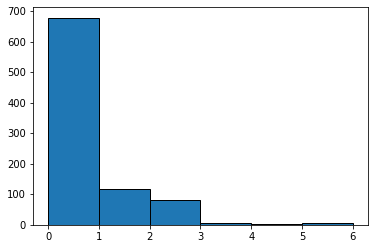

In [11]:
plt.hist(train['Parch'], bins=[x for x in range(0, 7)], edgecolor='black')

In [12]:
train['Parch_0'] = 0
train['Parch_1_more'] = 0
train.loc[train['Parch'] == 0, 'Parch_0'] = 1
train.loc[train['Parch'] >= 1, 'Parch_1_more'] = 1

In [13]:
train["Fare"].min(), train["Fare"].max()

(0.0, 512.3292)

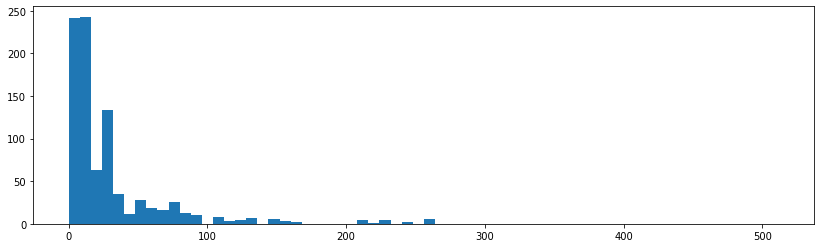

In [14]:
plt.figure(figsize=(14, 4))
plt.hist(train['Fare'] , bins=[x for x in range(0, 515, 8)])
plt.show()

In [15]:
number = int(train.shape[0] / 3)
fare = train['Fare'].sort_values()
fare[:number].shape, fare[number:number*2].shape,\
fare[number*2:].shape

((297,), (297,), (297,))

In [16]:
fare[:number].mean(), fare[number:number*2].mean(),\
fare[number*2:].mean()

(7.293979797979798, 15.939029292929293, 73.37961481481481)

In [17]:
fare[number-1:number].values[0], fare[number*2-1:number*2].values[0]

(8.6625, 26.0)

In [18]:
train['Fare_low'] = 0
train['Fare_middle'] = 0
train['Fare_high'] = 0
min_number = fare[number-1:number].values[0]
middle_number = fare[number*2-1:number*2].values[0]
train.loc[train['Fare'] >= min_number, 'Fare_low'] = 1
train.loc[((train['Fare'] > min_number) & (train['Fare'] < middle_number)), 'Fare_middle'] = 1
train.loc[train['Fare'] >= middle_number, 'Fare_high'] = 1

#### Remained: 
- Name - there may be some insights but too many data manipulations are needed
- Ticket - there may be some insights but too many data manipulations are needed
- Cabin - too many missing values

In [19]:
train.isna().sum()[train.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [20]:
train.corr()['Survived'].abs().sort_values(ascending=False) 

Survived        1.000000
Sex             0.543351
Pclass          0.338481
Pclass_3        0.322308
Pclass_1        0.285904
Fare_high       0.262888
Fare_low        0.261048
Fare            0.257307
SibSP_1         0.173076
Embarked_C      0.168240
Embarked_S      0.155660
Parch_0         0.147408
Parch_1_more    0.147408
SibSp_0         0.115867
Age_young       0.095582
Pclass_2        0.093349
Parch           0.081629
Age             0.077221
SibSp_2_more    0.070281
SibSp           0.035322
Age_old         0.022932
Fare_middle     0.011989
PassengerId     0.005007
Embarked_Q      0.003650
Name: Survived, dtype: float64

In [21]:
variables = train.corr()['Survived'].abs().sort_values(ascending=False)
variables = variables.drop(['Survived', 'Pclass', 'Fare', 'Parch', 'Age', 'SibSp', 'PassengerId',
                            'Pclass_2', 'Fare_middle', 'Parch_0', 'Age_old', 'SibSp_2_more', 'Embarked_Q'])

### Test data preparation

In [22]:
test['Sex'] = test['Sex'].map({'male':1, 'female':0})
dummies = pd.get_dummies(test[['Embarked', 'Pclass']].astype(object), prefix=['Embarked', 'Pclass'])
test = pd.concat([test, dummies], axis=1)
test['Age_young'] = 0
test['Age_old'] = 0
test.loc[test['Age'] < 20, 'Age_young'] = 1
test.loc[test['Age'] > 50, 'Age_old'] = 1
test['SibSp_0'] = 0
test['SibSP_1'] = 0
test['SibSp_2_more'] = 0
test.loc[test['SibSp'] == 0, 'SibSp_0'] = 1
test.loc[test['SibSp'] == 1, 'SibSP_1'] = 1
test.loc[test['SibSp'] >= 2, 'SibSp_2_more'] = 1
test['Parch_0'] = 0
test['Parch_1_more'] = 0
test.loc[test['Parch'] == 0, 'Parch_0'] = 1
test.loc[test['Parch'] >= 1, 'Parch_1_more'] = 1
number = int(test.shape[0] / 3)
fare = test['Fare'].sort_values()
test['Fare_low'] = 0
test['Fare_middle'] = 0
test['Fare_high'] = 0
min_number = fare[number-1:number].values[0]
middle_number = fare[number*2-1:number*2].values[0]
test.loc[test['Fare'] >= min_number, 'Fare_low'] = 1
test.loc[((test['Fare'] > min_number) & (test['Fare'] < middle_number)), 'Fare_middle'] = 1
test.loc[test['Fare'] >= middle_number, 'Fare_high'] = 1

### Train and test data

In [23]:
X_train = train[variables.index]
X_test = test[variables.index]
y_train = train['Survived'].values

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = train['Survived'].values
X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

## Models training

### Import of models

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### General pipeline

#### Import of accuracy and cross-validation functions

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

In [28]:
random_state = 13
# models to train
models = [DecisionTreeClassifier(random_state=random_state), RandomForestClassifier(random_state=random_state),
          LogisticRegression(random_state=random_state), SVC(random_state=random_state),
          KNeighborsClassifier(), # dont have random state. At least it did not work
          CatBoostClassifier(random_state=random_state, verbose=0),
          XGBClassifier(random_state=random_state), LGBMClassifier(random_state=random_state)]
# parameters to put in GridSearchCV for each model
params_grids = {'DecisionTreeClassier':{'criterion': ['gini', 'entropy']}, 
               'RandomForestClassifier':{'n_estimators': [5, 15, 50, 100, 200, 300], 'criterion': ['gini', 'entropy']},
               'LogisticRegression': {'C': [1, 5, 100, 500, 1000, 10000]}, 
               'SVC': {'C': [1, 5, 100, 500, 1000], 'kernel': ['rbf', 'sigmoid', 'poly']},
               'KNeighborsClassifier': {'n_neighbors':[x for x in range(1, 26)], 'weights': ['uniform', 'distance']},
               'CatBoostClassifier': {'iterations': [x for x in range(5, 31, 5)],
                                      'learning_rate': [0.01, 0.03,  0.05, 0.07, 0.1]},
               'XGBClassifier': {'iteration': [x for x in range(5, 31, 5)],
                                 'learning_rate':[0.01, 0.03,  0.05, 0.07, 0.1]}, 
               'LGBMClassifier': {'iteration': [x for x in range(5, 31, 5)],
                                 'learning_rate':[0.01, 0.03,  0.05, 0.07, 0.1]}}
# Cross-validation parameters
kf = KFold(n_splits=5, shuffle=True)

#### Main loop for models training and cross-validation

In [35]:
best_scores = {'DecisionTreeClassier':0, 'RandomForestClassifier':0, 'LogisticRegression':0, 
                   'SVC': 0, 'KNeighborsClassifier':0, 'CatBoostClassifier':0, 
                   'XGBClassifier':0, 'LGBMClassifier':0}
best_models = {'DecisionTreeClassier':0, 'RandomForestClassifier':0, 'LogisticRegression':0, 
                   'SVC': 0, 'KNeighborsClassifier':0, 'CatBoostClassifier':0, 
                   'XGBClassifier':0, 'LGBMClassifier':0}

for model, param_grid, estimator in zip(models, params_grids, best_scores):
    start = time.time()
    gs = GridSearchCV(model, params_grids[param_grid], scoring='accuracy', cv=kf, verbose=0, n_jobs=6)
    gs.fit(X_train, y_train)
    best_scores[estimator] = gs.best_score_
    best_models[estimator] = gs.best_estimator_
    print('Training', estimator, 'on 5 Kfold cv and params from param_grid took', round(time.time() - start, 2),
          'seconds')

Training DecisionTreeClassier on 5 Kfold cv and params from param_grid took 1.72 seconds
Training RandomForestClassifier on 5 Kfold cv and params from param_grid took 5.88 seconds
Training LogisticRegression on 5 Kfold cv and params from param_grid took 0.19 seconds
Training SVC on 5 Kfold cv and params from param_grid took 0.78 seconds
Training KNeighborsClassifier on 5 Kfold cv and params from param_grid took 0.99 seconds
Training CatBoostClassifier on 5 Kfold cv and params from param_grid took 51.06 seconds
Training XGBClassifier on 5 Kfold cv and params from param_grid took 5.75 seconds
Training LGBMClassifier on 5 Kfold cv and params from param_grid took 2.53 seconds


In [36]:
best_scores

{'DecisionTreeClassier': 0.812560416797439,
 'RandomForestClassifier': 0.8204130311970372,
 'LogisticRegression': 0.7901073378946707,
 'SVC': 0.8170547988199107,
 'KNeighborsClassifier': 0.804701525327977,
 'CatBoostClassifier': 0.8136902893729208,
 'XGBClassifier': 0.8069236080597578,
 'LGBMClassifier': 0.8069612704789405}

In [38]:
best_models

{'DecisionTreeClassier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=13, splitter='best'),
 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=15,
                        n_jobs=None, oob_score=False, random_state=13, verbose=0,
     

#### Answers writing to the files

In [37]:
for i in best_models:
    if i != 'CatBoostClassifier':
        preds = best_models[i].predict(X_test)
        submit = pd.DataFrame(test['PassengerId'])
        submit['Survived'] = preds
        submit.to_csv(i + '_NEW_many_vars_GridSearch_CV.csv', index=False)
    else:
        preds = best_models[i].predict(X_test)
        submit = pd.DataFrame(test['PassengerId'])
        submit['Survived'] = preds
        submit['Survived'] = submit['Survived'].astype(int)
        submit.to_csv(i + '_NEW_many_vars_GridSearch_CV.csv', index=False)

## In the end the best model performance on the test dataset was achieved via XGBoostClassifier and CatBoostClassifier models with equal score of 0.79186. TOP-9% on Kaggle leaderboard